In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
using CSV
using DataFrames

In [3]:
using CSV
using DataFrames
file_path = "change_population_Monday.csv"
df_Mon = CSV.File(file_path)  |> DataFrame

,time,stop1,stop2,stop3,stop4,stop5,stop6,stop7,stop8
,String7,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,06:11AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,06:12AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,06:13AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,06:14AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,06:15AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,06:16AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,06:17AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,06:18AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,06:19AM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
Pkg.add("Random")
Pkg.add("Distributions")
Pkg.add("Roots")
Pkg.add("Metaheuristics")
Pkg.add("Plots")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [5]:
using Random # for random seeds
using Distributions # statistical distribution interface
using Roots # find zeros of functions
using Metaheuristics # search algorithms
using Plots # plotting

In [6]:
dict_Mon = Dict{String, Any}()

for row in eachrow(df_Mon)
    time_key = row.time
    temp_matrix = zeros(9, 9)
    temp_positive = zeros(9)
    total_positive = 0
    
    for column in 2:10
        if row[column] > 0
            temp_positive[column - 1] = row[column]
        end
    end
    
    total_positive = sum(temp_positive)
    
    for i in 2:10
        if row[i] < 0
            for j in 2:10
                if row[j] > 0
                    temp_matrix[i-1, j-1] = -row[i] * row[j] / total_positive
                end
            end
        end
    end
    
    entry = (time_key => temp_matrix)  # Creating a key-value pair
    push!(dict_Mon, entry)  # Pushing the key-value pair into the dictionary
end


In [7]:
function counter_clockwise(matrix)
    new_matrix = zeros(9, 9)
    for i in 2: 9
        for j in 2: 9
            if i < j
                new_matrix[i, j] = matrix[i, j]
            end
        end
    end
    for j in 2: 6
        new_matrix[1, j] = matrix[1, j]
    end
    for i in 7: 9
        new_matrix[i, 1] = matrix[i, 1]
    end
    return new_matrix
end

function clockwise(matrix)
    new_matrix = zeros(9, 9)
    for i in 1: 9
        for j in 1: 9
            if i > j
                new_matrix[i, j] = matrix[i, j]
            end
        end
    end
    for j in 7: 9
        new_matrix[1, j] = matrix[1, j]
    end
    for i in 2: 6
        new_matrix[i, 1] = matrix[i, 1]
    end
    return new_matrix
end

clockwise (generic function with 1 method)

In [8]:
dict_Mon_counter_clockwise = Dict{String, Any}()#1,2,3,...,9, 1
dict_Mon_clockwise = Dict{String, Any}()#1,9,8,..., 2, 1
dict_Mon_counter_clockwise = Dict(key => counter_clockwise(matrix) for (key, matrix) in dict_Mon)
dict_Mon_clockwise = Dict(key => clockwise(matrix) for (key, matrix) in dict_Mon)

Dict{String, Matrix{Float64}} with 1029 entries:
  "06:31PM" => [0.0 0.0 … 0.35 0.35; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; …
  "04:16PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "10:08AM" => [0.0 0.0 … 0.789051 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "03:55PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "05:21PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "04:39PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 1.925 … 0.0 0.0; …
  "06:53AM" => [0.0 0.0 … 0.0 0.161538; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "04:04PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.…
  "08:37AM" => [0.0 0.0 … 0.0 0.877914; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "07:22PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 2.14286 … 0.0 0.0…
  "03:58PM" => [0.0 0.0 … 0.161538 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "10:49PM" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.

In [9]:
dict_int_Mon_counter_clockwise = Dict{String, Any}()#1,2,3,...,9, 1
dict_int_Mon_clockwise = Dict{String, Any}()#1,9,8,..., 2, 1
dict_int_Mon_counter_clockwise = Dict(key => round.(Int, matrix) for (key, matrix) in dict_Mon_counter_clockwise)
dict_int_Mon_clockwise = Dict(key => round.(Int, matrix) for (key, matrix) in dict_Mon_clockwise);

In [10]:
dict_int_Mon_counter_clockwise_timepoint = Dict(1:length(dict_int_Mon_counter_clockwise) .=> values(dict_int_Mon_counter_clockwise))
dict_int_Mon_clockwise_timepoint = Dict(1:length(dict_int_Mon_clockwise) .=> values(dict_int_Mon_clockwise));

In [11]:
bus_time_counter_clockwise = [2, 1, 1, 1, 1, 6, 2, 2, 2]
bus_time_clockwise = [2, 2, 2, 5, 2, 1, 1, 1, 2];

In [12]:
function track_Mon_counter_clockwise(accumulation_matrix_t, t)
    #calculate the accumulation from t'+1 to t, and start a new accumulation from t+1. 
    #   This means if the bus arrives at time t, time t's distribution will be considered in this bus.
    temp_demand_matrix = zeros(9, 9)
    temp_total_demand_matrix = zeros(9, 9)
    temp_vector = zeros(9)
    sum_total = 0
    for i in 1:9
        #sum_total = 0
        #for j in i:i+1 #1:(i-1)
        #    sum_total += bus_time_counter_clockwise[j]
        #end
        t_end = minimum([1029, t+sum_total])
        for time in t:t_end #1:sum_total
            temp_demand_matrix[i, :] .+= dict_int_Mon_counter_clockwise_timepoint[time][i, :]
        end
        sum_total += bus_time_counter_clockwise[i] # travel to next stop
    end

    temp_vector[1] = sum(accumulation_matrix_t[1, :])
    for i in 1:8
        temp_vector[i+1] = sum(accumulation_matrix_t[i, :]) + sum(temp_demand_matrix[i, :]) -sum(accumulation_matrix_t[:, i]) - sum(temp_demand_matrix[:, i]) + temp_vector[i]
    end
    temp_total_demand_matrix = accumulation_matrix_t + temp_demand_matrix
    return temp_vector, temp_total_demand_matrix, temp_demand_matrix
end

track_Mon_counter_clockwise (generic function with 1 method)

In [13]:
function track_Mon_clockwise(accumulation_matrix_t, t)
    #calculate the accumulation from t'+1 to t, and start a new accumulation from t+1. 
    #   This means if the bus arrives at time t, time t's distribution will be considered in this bus.
    temp_demand_matrix = zeros(9, 9)
    temp_total_demand_matrix = zeros(9, 9)
    temp_vector = zeros(9)
    sum_total = 0
    for i in 1:9
        #sum_total = 0
        #for j in i:i+1 #1:(i-1)
        #    sum_total += bus_time_counter_clockwise[j]
        #end
        t_end = minimum([1029, t+sum_total])
        for time in t:t_end #1:sum_total
            temp_demand_matrix[i, :] .+= dict_int_Mon_clockwise_timepoint[time][i, :]
        end
        sum_total += bus_time_clockwise[i] # travel to next stop
    end

    temp_vector[1] = sum(accumulation_matrix_t[1, :])
    for i in 1:8
        temp_vector[i+1] = sum(accumulation_matrix_t[i, :]) + sum(temp_demand_matrix[i, :]) -sum(accumulation_matrix_t[:, i]) - sum(temp_demand_matrix[:, i]) + temp_vector[i]
    end
    temp_total_demand_matrix = accumulation_matrix_t + temp_demand_matrix
    return temp_vector, temp_total_demand_matrix, temp_demand_matrix
end

track_Mon_clockwise (generic function with 1 method)

In [14]:
function derive_accumulation_Mon_counter_clockwise(t0, t, left)
    #t0:send last bus. Accumulate from t0+1 to t(include time t distribution)
    accumulation_matrix = zeros(9, 9)
    accumulation_matrix1 = zeros(9, 9)
    sum_total = zeros(9, 9)
    for i in (t0 + 1) : t
        accumulation_matrix1 .+= dict_int_Mon_counter_clockwise_timepoint[i]
    end
    for i in 1: 9
        sum_total[i] = left[i] + sum(accumulation_matrix1[i, :])
        for j in 1: 9
            accumulation_matrix[i, j] = sum_total[i] * accumulation_matrix1[i, j] / (sum(accumulation_matrix1[i, :])+1e-10)
        end
    end

    return accumulation_matrix
end

derive_accumulation_Mon_counter_clockwise (generic function with 1 method)

In [20]:
function derive_accumulation_Mon_clockwise(t0, t, left)
    #t0:send last bus. Accumulate from t0+1 to t(include time t distribution)
    accumulation_matrix = zeros(9, 9)
    accumulation_matrix1 = zeros(9, 9)
    sum_total = zeros(9, 9)
    for i in (t0 + 1) : t
        accumulation_matrix1 .+= dict_int_Mon_clockwise_timepoint[i]
    end
    for i in 1: 9
        sum_total[i] = left[i] + sum(accumulation_matrix1[i, :])
        for j in 1: 9
            accumulation_matrix[i, j] = sum_total[i] * accumulation_matrix1[i, j] / (sum(accumulation_matrix1[i, :])+1e-10)
        end
    end


    return accumulation_matrix
end

derive_accumulation_Mon_clockwise (generic function with 1 method)

In [15]:
function derive_busnumber_over_capacity(vector, temp_total_demand_matrix)
    #over capacity: send several buses at the same time. If one stop's people is greater than capacity, 
    #   then we need to send a bus then change the demand matrix(for those who get on the bus, they will 
    #   get to different stops with a certain proportion like we mentioned above.)
    capacity = 69
    #left_at_stop = zeros(9)
    bus_number = zeros(9)
    total_bus_number = 0
    bus_number_array =[0]
    for i in 1: 9
        if vector[i] > capacity
            bus_number[i] = div(vector[i], capacity)
            #total_bus_number += bus_number[i]
            push!(bus_number_array, bus_number[i])
            capacity_total = total_bus_number * capacity
            change_vector = zeros(9)
            vector[i] = capacity_total

            if i == 1
                get_on_bus = capacity_total 
            else get_on_bus = capacity_total - vector[i - 1] + sum(temp_total_demand_matrix[:, i])
            end

            for k in 1: 9
                change_vector[k] = temp_total_demand_matrix[i, k] / (sum(temp_total_demand_matrix[i, :])+1e-10)
                temp_total_demand_matrix[i, k] = get_on_bus * change_vector[k]
            end
            
            for j in (i+1): 9
                vector[j] = sum(temp_total_demand_matrix[j, :])  - sum(temp_total_demand_matrix[:, j]) + vector[j - 1]
            end

        end
    end
    return maximum(bus_number_array) #total_bus_number
end        

derive_busnumber_over_capacity (generic function with 1 method)

In [16]:
function left_people(vector, temp_total_demand_matrix)
    bus_number = derive_busnumber_over_capacity(vector, temp_total_demand_matrix)
    capacity = 69
    total_capacity = bus_number * capacity
    left = zeros(9)
    change_vector = zeros(9)
    for i in 1: 9
        if vector[i] > total_capacity
            left[i] = vector[i] - total_capacity
            vector[i] = total_capacity
            
            if i == 1
                get_on_bus = total_capacity
            else get_on_bus = total_capacity - vector[i - 1] + sum(temp_total_demand_matrix[:, i])
            end

            for k in 1: 9
                change_vector[k] = temp_total_demand_matrix[i, k] / (sum(temp_total_demand_matrix[i, :])+1e-10)
                temp_total_demand_matrix[i, k] = get_on_bus * change_vector[k]
            end
            
            for j in (i+1): 9
                vector[j] = sum(temp_total_demand_matrix[j, :])  - sum(temp_total_demand_matrix[:, j]) + vector[j - 1]
            end
        end
    end
    return left
end   

left_people (generic function with 1 method)

In [17]:
function left_people_test(vector, temp_total_demand_matrix)
    bus_number = derive_busnumber_over_capacity(vector, temp_total_demand_matrix)
    capacity = 69
    total_capacity = bus_number * capacity
    left = zeros(9)
    change_vector = zeros(9)
    for i in 1: 9
        if vector[i] > total_capacity
            left[i] = vector[i] - total_capacity
            vector[i] = total_capacity
            
            if i == 1
                get_on_bus = total_capacity
            else get_on_bus = total_capacity - vector[i - 1] + sum(temp_total_demand_matrix[:, i])
            end

            for k in 1: 9
                change_vector[k] = temp_total_demand_matrix[i, k] / (sum(temp_total_demand_matrix[i, :])+1e-10)
                temp_total_demand_matrix[i, k] = get_on_bus * change_vector[k]
            end
            
            for j in (i+1): 9
                vector[j] = sum(temp_total_demand_matrix[j, :])  - sum(temp_total_demand_matrix[:, j]) + vector[j - 1]
            end
        end
    end
    return left, bus_number
end   

left_people_test (generic function with 1 method)

In [18]:
nonZeroDemand_counter_clockwise = false
people_left_counter_clockwise = zeros(9)
t_recentBus_counter_clockwise = 3
buses_sent_counter_clockwise = 1

buses_sent_array_counter_clockwise = []
temp_total_demand_matrix_array_counter_clockwise = []
accumulation_matrix_t_array_counter_clockwise = []
people_left_array_counter_clockwise = []
vector_array_counter_clockwise = []
people_on_bus_array_counter_clockwise = []

temp_demand_matrix_array_counter_clockwise = []

for t in 1:length(dict_int_Mon_counter_clockwise)
    matrix_stops_counter_clockwise = dict_int_Mon_counter_clockwise_timepoint[t]
    if sum(matrix_stops_counter_clockwise) > 0
        nonZeroDemand_counter_clockwise = true # first instance of non zero demand
    end
    if nonZeroDemand_counter_clockwise
        accumulation_matrix_t_counter_clockwise = derive_accumulation_Mon_counter_clockwise(t_recentBus_counter_clockwise, t, people_left_counter_clockwise)
        vector_counter_clockwise, temp_total_demand_matrix_counter_clockwise, temp_demand_matrix_counter_clockwise = track_Mon_counter_clockwise(accumulation_matrix_t_counter_clockwise, t)
        #=
        buses_sent = derive_busnumber_over_capacity(vector, temp_total_demand_matrix)
        people_left = left_people(vector, temp_total_demand_matrix)
        =#
        people_left_counter_clockwise, buses_sent_counter_clockwise = left_people_test(vector_counter_clockwise, temp_total_demand_matrix_counter_clockwise)
        people_on_bus_counter_clockwise=0
        
        if buses_sent_counter_clockwise > 0
            t_recentBus_counter_clockwise = t
            people_on_bus_counter_clockwise = sum(temp_total_demand_matrix_counter_clockwise) - sum(people_left_counter_clockwise)
        end

        push!(buses_sent_array_counter_clockwise, buses_sent_counter_clockwise)        
        push!(temp_total_demand_matrix_array_counter_clockwise, temp_total_demand_matrix_counter_clockwise)
        push!(accumulation_matrix_t_array_counter_clockwise, accumulation_matrix_t_counter_clockwise)
        push!(people_left_array_counter_clockwise, people_left_counter_clockwise)
        push!(vector_array_counter_clockwise, vector_counter_clockwise)
        push!(people_on_bus_array_counter_clockwise, people_on_bus_counter_clockwise)
        push!(temp_demand_matrix_array_counter_clockwise, temp_demand_matrix_counter_clockwise)
    end
end

In [21]:
nonZeroDemand_clockwise = false
people_left_clockwise = zeros(9)
t_recentBus_clockwise = 3
buses_sent_clockwise = 1

buses_sent_array_clockwise = []
temp_total_demand_matrix_array_clockwise = []
accumulation_matrix_t_array_clockwise = []
people_left_array_clockwise = []
vector_array_clockwise = []
people_on_bus_array_clockwise = []

temp_demand_matrix_array_clockwise = []

for t in 1:length(dict_int_Mon_clockwise)
    matrix_stops_clockwise = dict_int_Mon_clockwise_timepoint[t]
    if sum(matrix_stops_clockwise) > 0
        nonZeroDemand_clockwise = true # first instance of non zero demand
    end
    if nonZeroDemand_clockwise
        accumulation_matrix_t_clockwise = derive_accumulation_Mon_clockwise(t_recentBus_clockwise, t, people_left_clockwise)
        vector_clockwise, temp_total_demand_matrix_clockwise, temp_demand_matrix_clockwise = track_Mon_clockwise(accumulation_matrix_t_clockwise, t)
        #=
        buses_sent = derive_busnumber_over_capacity(vector, temp_total_demand_matrix)
        people_left = left_people(vector, temp_total_demand_matrix)
        =#
        people_left_clockwise, buses_sent_clockwise = left_people_test(vector_clockwise, temp_total_demand_matrix_clockwise)
        people_on_bus_clockwise = 0
        if buses_sent_clockwise > 0
            t_recentBus_clockwise = t
            people_on_bus_clockwise = sum(temp_total_demand_matrix_clockwise) - sum(people_left_clockwise)
        end

        push!(buses_sent_array_clockwise, buses_sent_clockwise)        
        push!(temp_total_demand_matrix_array_clockwise, temp_total_demand_matrix_clockwise)
        push!(accumulation_matrix_t_array_clockwise, accumulation_matrix_t_clockwise)
        push!(people_left_array_clockwise, people_left_clockwise)
        push!(vector_array_clockwise, vector_clockwise)
        push!(people_on_bus_array_clockwise, people_on_bus_clockwise)
        push!(temp_demand_matrix_array_clockwise, temp_demand_matrix_clockwise)
    end
end

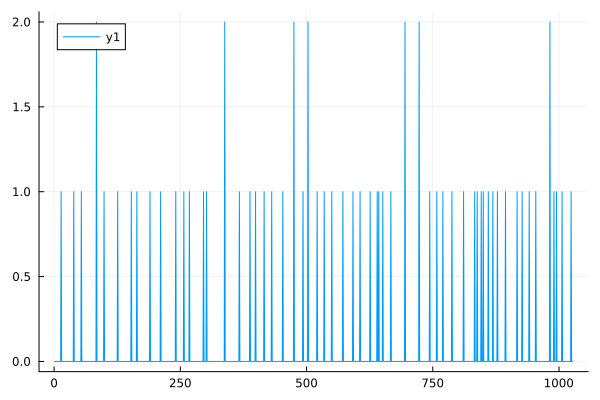

In [66]:
plot(buses_sent_array_clockwise)

In [22]:
buses_sent_array_counter_clockwise_copy = copy.(buses_sent_array_counter_clockwise)
loop_counter_clockwise = sum(bus_time_counter_clockwise)
real_bus_number_counter_clockwise = []
time_vector_counter_clockwise = []
push!(real_bus_number_counter_clockwise, 0)
push!(time_vector_counter_clockwise, 1)

for t in 2: 1027
    real_bus_number_counter_clockwise .+= 1
    while buses_sent_array_counter_clockwise_copy[t] >= 1
        flag = 1
        for bus in 1: length(real_bus_number_counter_clockwise)
            if real_bus_number_counter_clockwise[bus] >= loop_counter_clockwise
                real_bus_number_counter_clockwise[bus] = 0
                flag = 0
                break
            end
        end
        if flag == 1
            push!(real_bus_number_counter_clockwise, 0)
            push!(time_vector_counter_clockwise, t)
        end
        buses_sent_array_counter_clockwise_copy[t] -= 1
    end
end

bus_number_counter_clockwise = length(real_bus_number_counter_clockwise)

21

In [50]:
time_vector_counter_clockwise

21-element Vector{Any}:
   1
   8
  12
  35
  36
  37
  39
  64
  65
  66
   ⋮
  70
  71
 471
 472
 472
 473
 474
 476
 477

In [38]:
real_bus_number_counter_clockwise

21-element Vector{Any}:
   5
  18
  21
  18
  14
  12
  32
  49
  44
  43
   ⋮
  39
  39
  37
 555
 555
 554
 553
 551
 550

In [72]:
bus_deploy_road_counter_clockwise = zeros(length(dict_int_Mon_clockwise))
for t in 1:length(dict_int_Mon_clockwise)
    if t in time_vector_counter_clockwise #bus is deployed at this time
        # which bus was it? --> index
        index = findfirst(x -> x == t, time_vector_counter_clockwise)

        # value is how many minute bus was on the road for
        bus_total_loop_min = real_bus_number_counter_clockwise[index]

        #update array
        bus_deploy_road_counter_clockwise[t] = bus_deploy_road_counter_clockwise[t] .+ 1
        #bus_deploy_road_counter_clockwise[t:t+bus_total_loop_min] = bus_deploy_road_counter_clockwise[t:t+bus_total_loop_min] .+ 1
    end
end

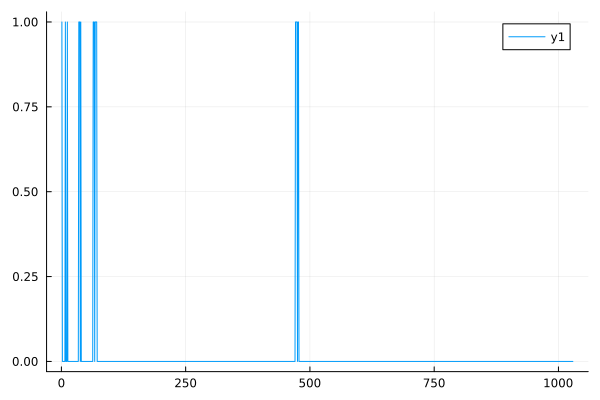

In [74]:
plot(bus_deploy_road_counter_clockwise)

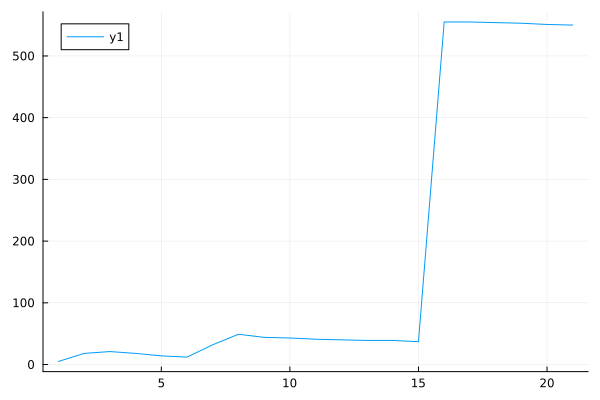

In [37]:
plot(real_bus_number_counter_clockwise)

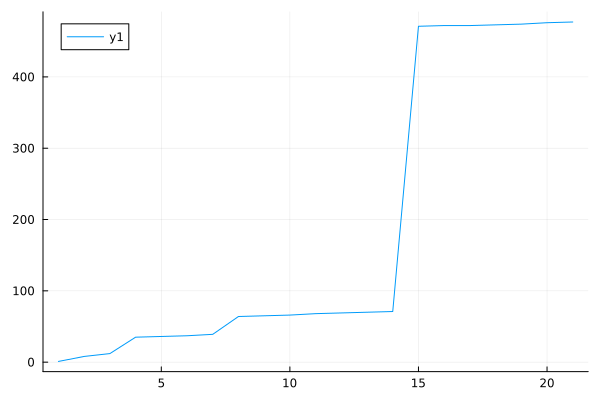

In [23]:
plot(time_vector_counter_clockwise)

In [59]:
buses_sent_array_clockwise_copy = copy.(buses_sent_array_clockwise)
loop_clockwise = sum(bus_time_clockwise)
real_bus_number_clockwise = []
time_vector_clockwise = []
push!(real_bus_number_clockwise, 0)
push!(time_vector_clockwise, 1)

for t in 2: 1027
    real_bus_number_clockwise .+= 1
    while buses_sent_array_clockwise_copy[t] >= 1
        flag = 1
        for bus in 1: length(real_bus_number_clockwise)
            if real_bus_number_clockwise[bus] >= loop_clockwise
                real_bus_number_clockwise[bus] = 0
                flag = 0
                break
            end
        end
        if flag == 1
            push!(real_bus_number_clockwise, 0)
            push!(time_vector_clockwise, t)
        end
        buses_sent_array_clockwise_copy[t] -= 1
    end
end

bus_number_clockwise = length(real_bus_number_clockwise)



4

In [75]:
bus_deploy_road_clockwise = zeros(length(dict_int_Mon_clockwise))
for t in 1:length(dict_int_Mon_clockwise)
    if t in time_vector_clockwise #bus is deployed at this time
        # which bus was it? --> index
        index = findfirst(x -> x == t, time_vector_clockwise)

        # value is how many minute bus was on the road for
        bus_total_loop_min = real_bus_number_clockwise[index]

        #update array
        bus_deploy_road_clockwise[t] = bus_deploy_road_clockwise[t] .+ 1
        #bus_deploy_road_clockwise[t:t+bus_total_loop_min] = bus_deploy_road_clockwise[t:t+bus_total_loop_min] .+ 1
    end
end

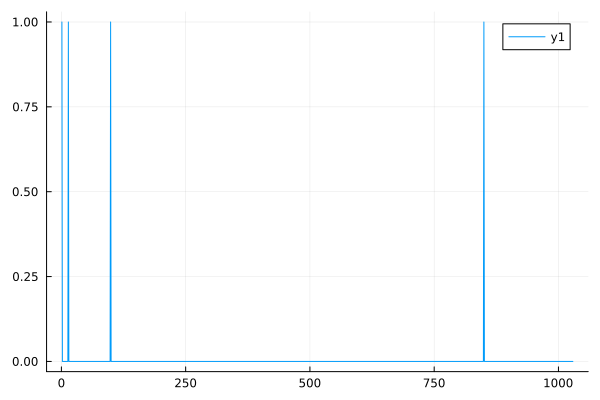

In [76]:
plot(bus_deploy_road_clockwise)

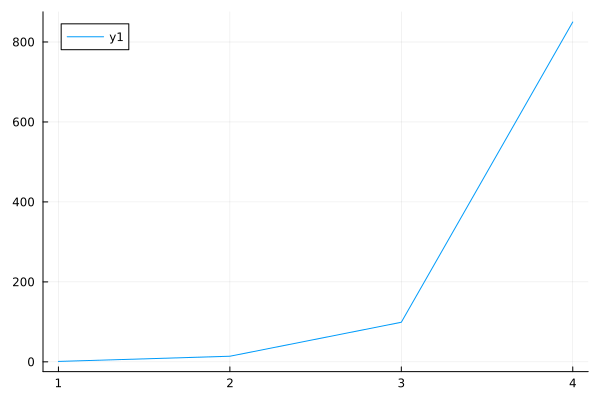

In [25]:
plot(time_vector_clockwise)

In [26]:
people_on_bus_array_clockwise

1027-element Vector{Any}:
   0
   0
   0
   0
   0
   0
   0
   0
   0
   0
   ⋮
   0
   0
   0
   0
   0
 209.99999999858125
   0
   0
   0

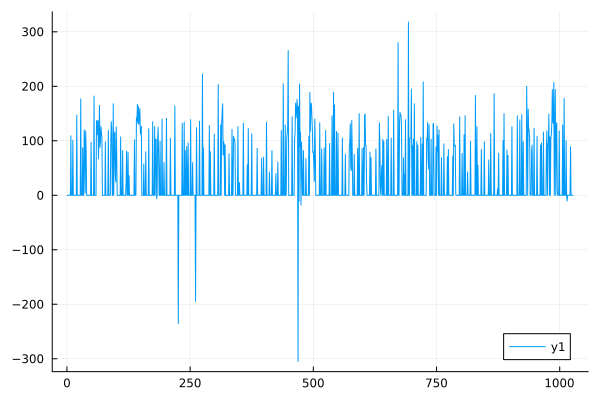

In [27]:
plot(people_on_bus_array_counter_clockwise)

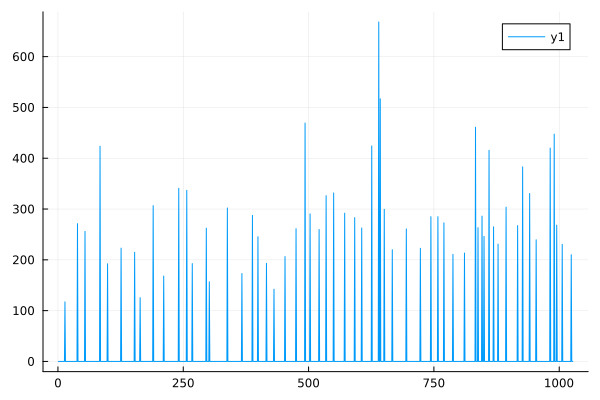

In [28]:
plot(people_on_bus_array_clockwise)

In [29]:
sum(people_on_bus_array_counter_clockwise)

32737.04225532419

In [30]:
sum(people_on_bus_array_clockwise)

17061.040545178574

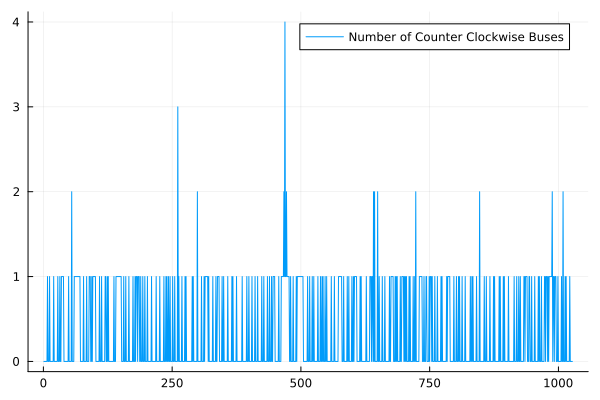

In [78]:
plot(buses_sent_array_counter_clockwise, label="Number of Counter Clockwise Buses")

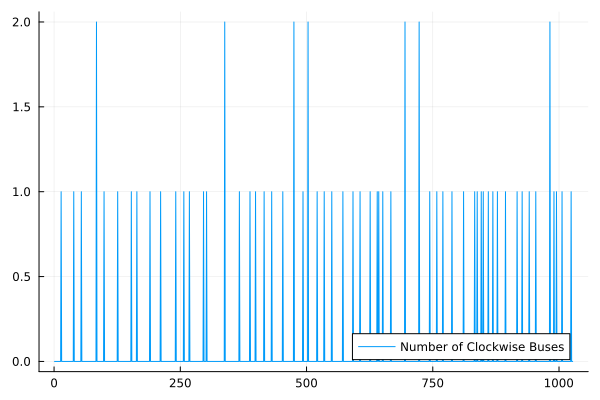

In [87]:
plot(buses_sent_array_clockwise, label="Number of Clockwise Buses", legend=:bottomright)

In [109]:
sum(buses_sent_array_clockwise)

67

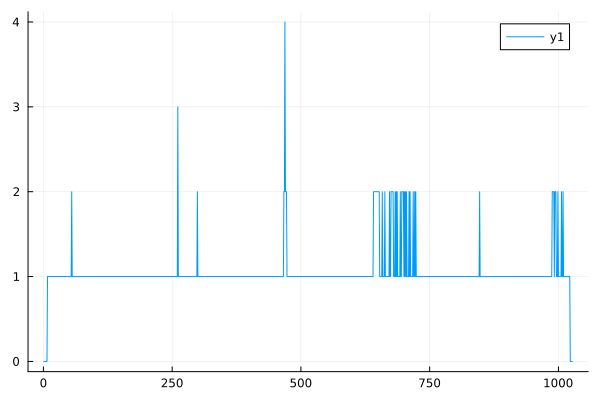

In [92]:
plot(replace_values(buses_sent_array_counter_clockwise))

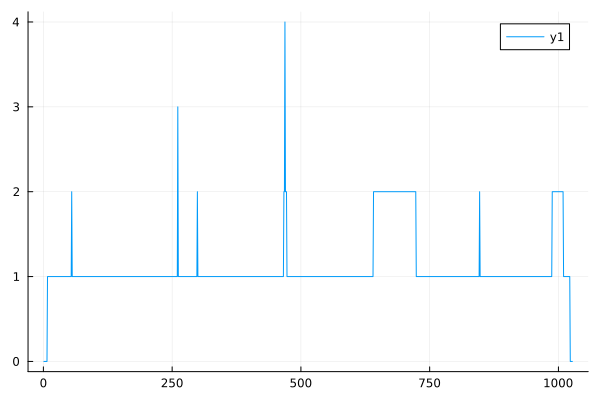

In [93]:
plot(replace_values(replace_values(replace_values(buses_sent_array_counter_clockwise))))

In [74]:
function replace_values(arr)
    n = length(arr)
    result = copy(arr)
    for i in 1:n
        for j in (i+1):min(i+120, n)
            if arr[j] == arr[i]
                for k in (i+1):(j-1)
                    if arr[k] <= arr[i]
                        result[k] = arr[i]
                    end
                end
                break
            end
        end
    end
    return result
end


replace_values (generic function with 1 method)

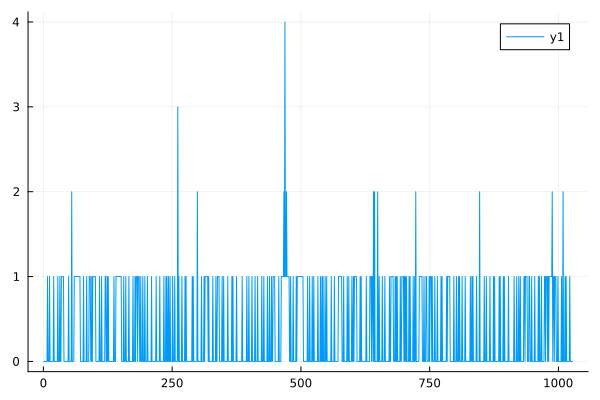

In [94]:
plot(buses_sent_array_counter_clockwise)

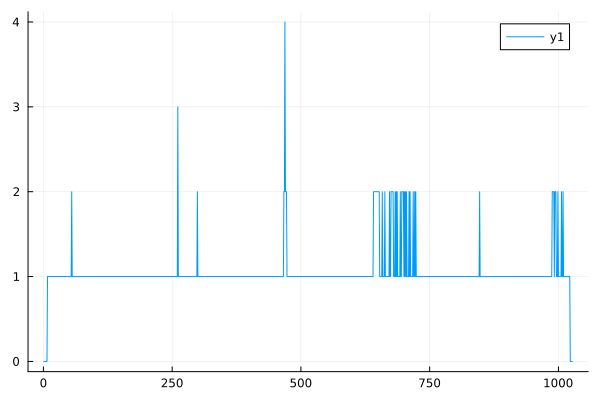

In [95]:
plot(replace_values(buses_sent_array_counter_clockwise))

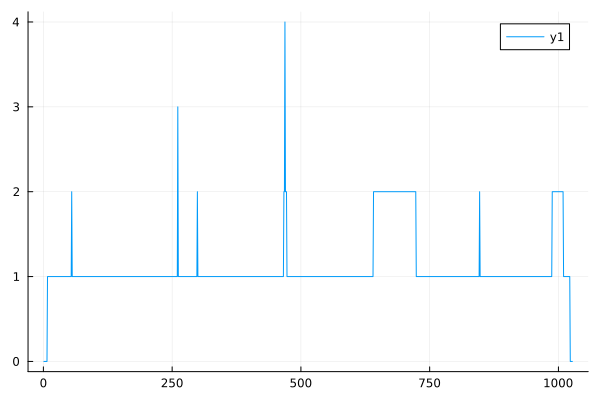

In [96]:
plot(replace_values(replace_values(replace_values(buses_sent_array_counter_clockwise))))

In [97]:
findmax(buses_sent_array_counter_clockwise)

(4, 469)

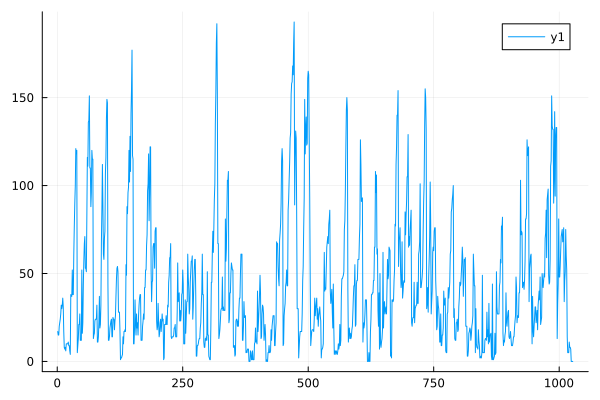

In [98]:
plot(sum.(collect(values(temp_demand_matrix_array_counter_clockwise))))

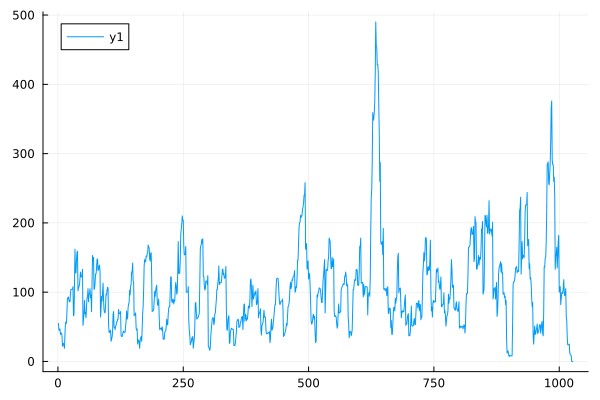

In [110]:
plot(sum.(collect(values(temp_demand_matrix_array_clockwise))))

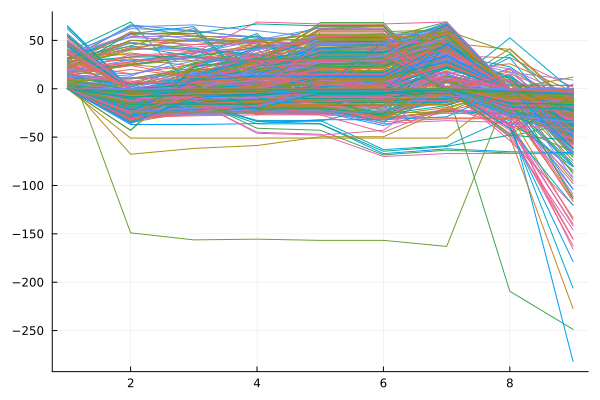

In [99]:
plot(vector_array_counter_clockwise, legend=false)

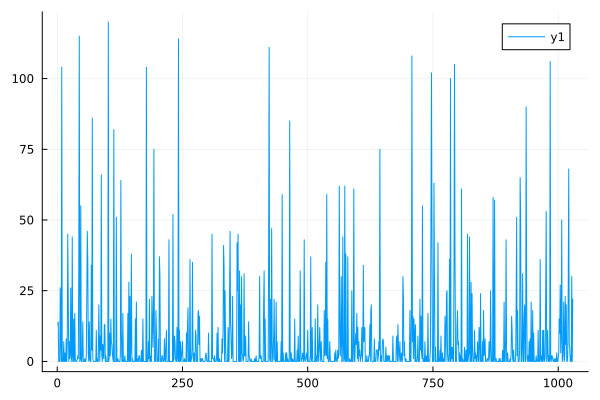

In [101]:
plot(sum.(collect(values(dict_int_Mon_counter_clockwise_timepoint))))

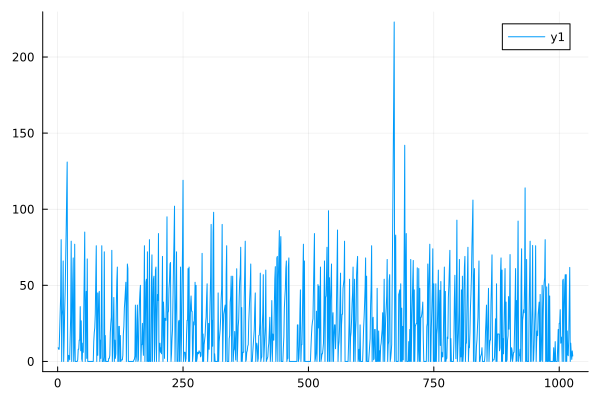

In [102]:
plot(sum.(people_left_array_counter_clockwise))

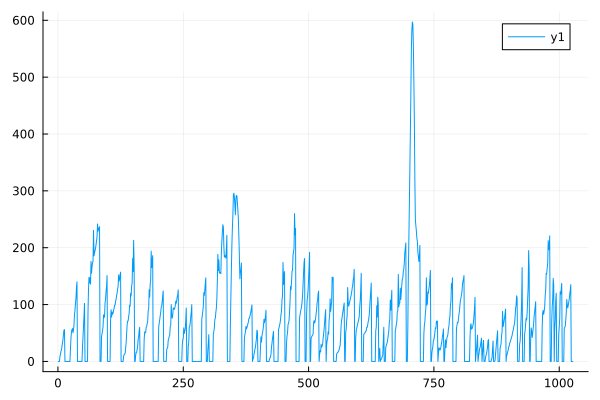

In [111]:
plot(sum.(people_left_array_clockwise))

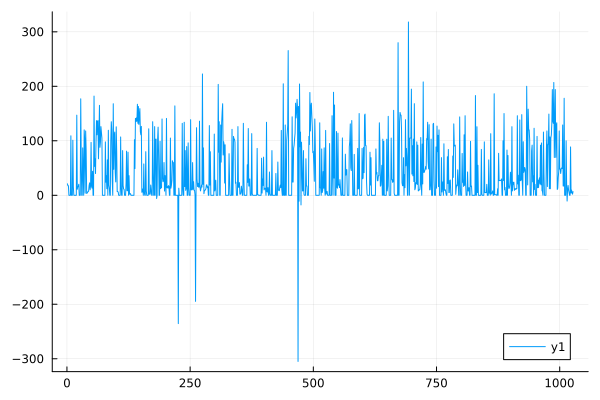

In [103]:
plot(sum.(collect(values(temp_total_demand_matrix_array_counter_clockwise))))

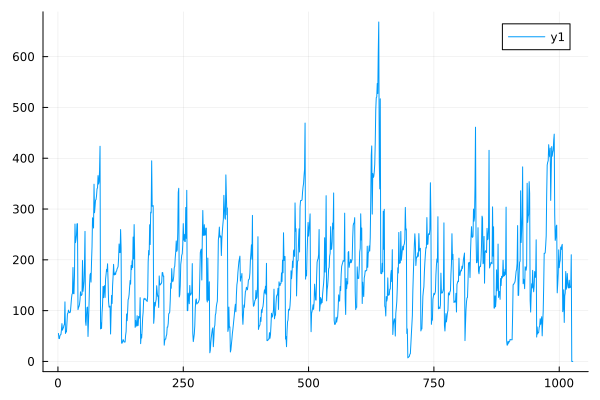

In [112]:
plot(sum.(collect(values(temp_total_demand_matrix_array_clockwise))))

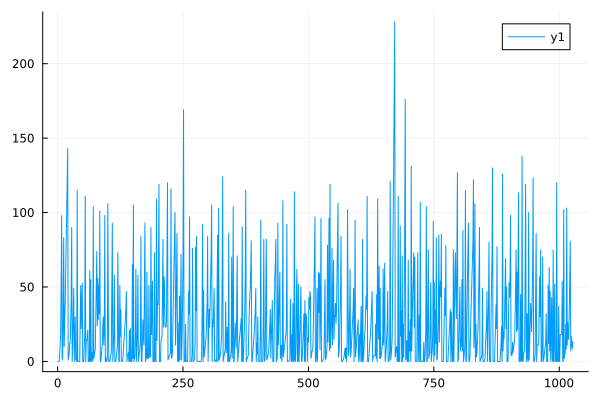

In [104]:
plot(sum.(collect(values(accumulation_matrix_t_array_counter_clockwise))))

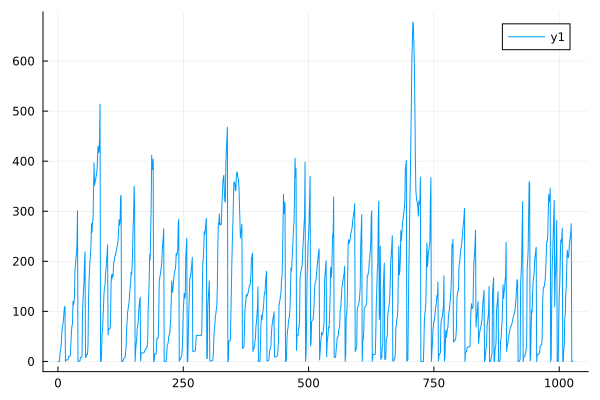

In [113]:
plot(sum.(collect(values(accumulation_matrix_t_array_clockwise))))

In [105]:
findmax(buses_sent_array_counter_clockwise)

(4, 469)

In [114]:
findmax(buses_sent_array_clockwise)

(2, 84)

In [106]:
for i in 1:length(buses_sent_array_counter_clockwise)
    if buses_sent_array_counter_clockwise[i] == 4
        println(i)
    end
end

469


In [116]:
for i in 1:length(buses_sent_array_clockwise)
    if buses_sent_array_clockwise[i] == 2
        println(i)
    end
end

84
338
475
503
695
723
982
